In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

import tensorflow_probability as tfp
Normal = tfp.distributions.Normal

In [30]:
NUM_TRIALS = 2000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [31]:
class Bandit :
    def __init__(self, p) :
        self.p = p
        self.N = 0 
        self.m = 0  #mean
        self.l = 1  #lambda
        self.tau = 1
        self.sum_x = 0
        
    def sample(self, sample_shape = ()) :
        #return Normal(self.m, 1 / self.l).sample(sample_shape=sample_shape).numpy()
        return np.random.randn() / np.sqrt(self.l) + self.m
    
    def pull(self) :
        return np.random.randn() / np.sqrt(self.tau) + self.p
    
    def update(self, x) :
        self.N += 1
        self.sum_x += x
        self.l = self.tau * 1 + self.l
        self.m = (self.tau * self.sum_x + 0) / self.l  #prior mean is 0 i.e + 0
        
def plot(bandits, trial) :
    x = np.linspace(0, 1, 200)
    for b in bandits :
        y = norm.pdf(x, loc = b.m, scale = np.sqrt(1 / b.l))
        plt.plot(x, y, label = f"real p : {b.p:.2f}, num plays : {b.N}")
        #ax = sns.kdeplot(b.sample(200), label = f"real p : {b.p:.2f} win rate : {b.a - 1} / {b.N}")
    plt.title(f'Bandit distributions over {trial} trials')
    plt.legend()
    plt.show()

def experiment() :
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    
    sample_points = [1, 5, 10, 20, 50, 100, 200, 1000, 1500, 1999]
    rewards = np.zeros(NUM_TRIALS)
    for i in range(NUM_TRIALS) :
        #obtain a sample by thompson sampling
        j = np.argmax([b.sample() for b in bandits])
        
        #plot the posteriors
        if i in sample_points :
            plot(bandits, i)
        
        x = bandits[j].pull()
        bandits[j].update(x)
        rewards[i] = x
    
    plt.figure()
    cumulative_rewards = np.cumsum(rewards)
    win_rates = cumulative_rewards / (np.arange(NUM_TRIALS) + 1)
    plt.plot(win_rates)
    for b in BANDIT_PROBABILITIES :
        plt.plot(np.ones(NUM_TRIALS) * b)
    plt.show()
        
    print(f'Total reward earned : {rewards.sum()}')

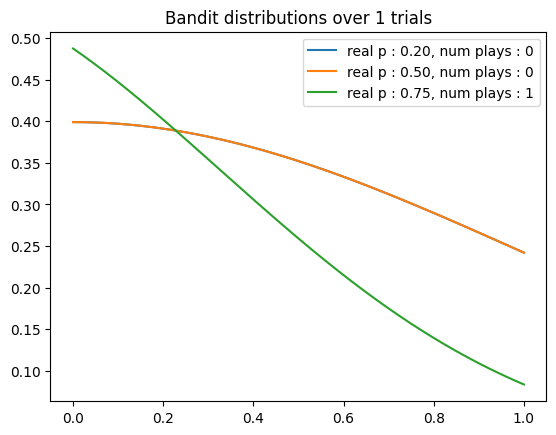

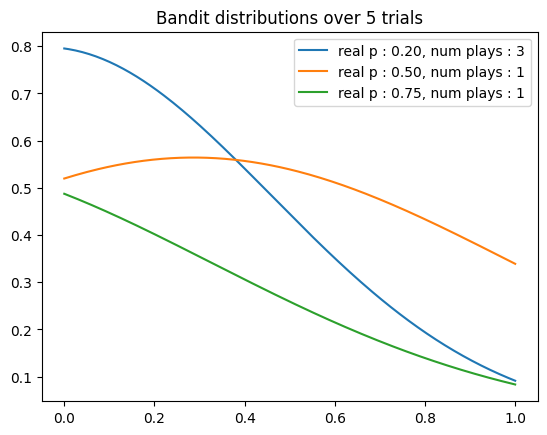

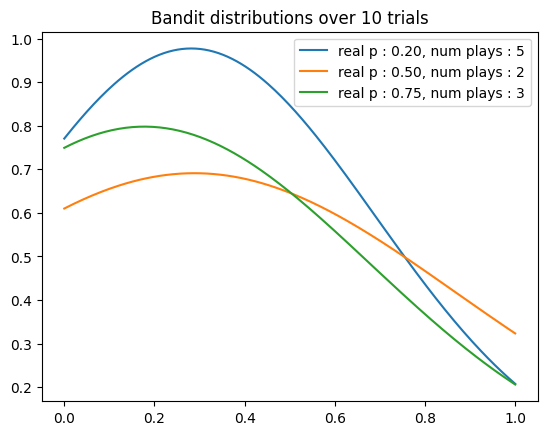

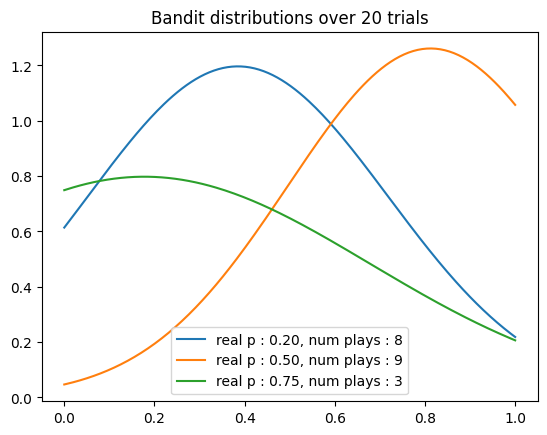

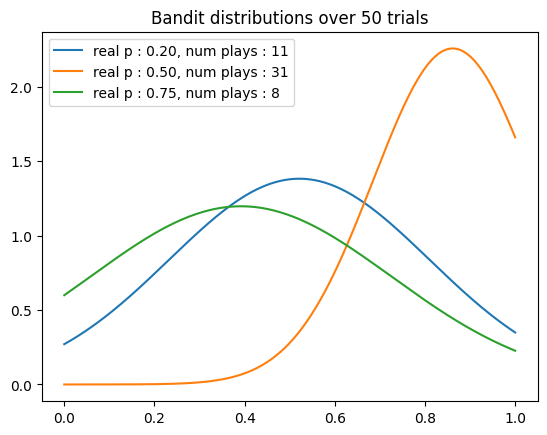

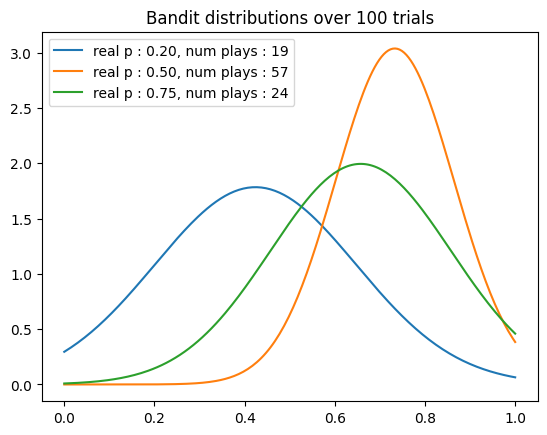

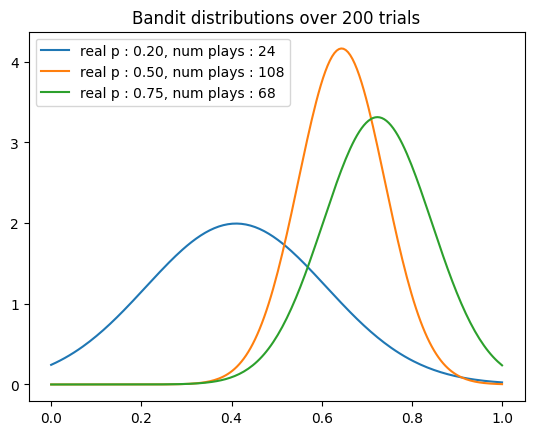

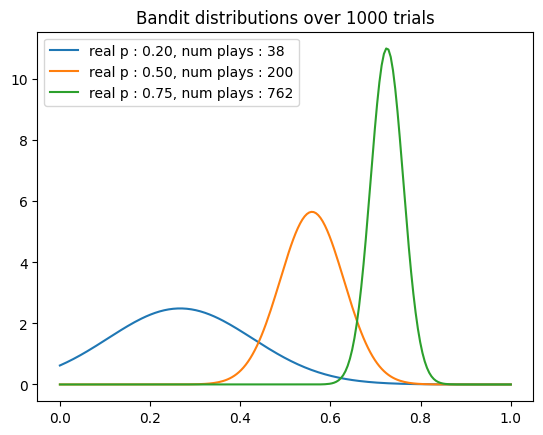

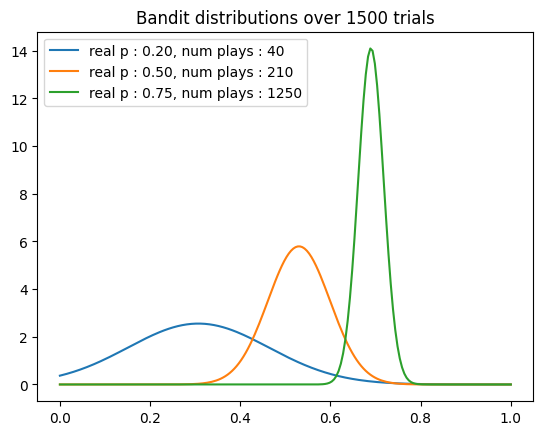

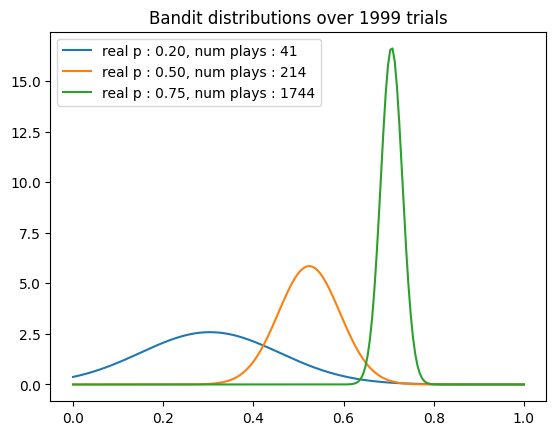

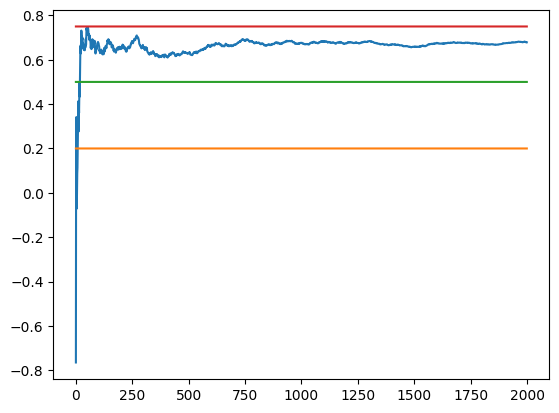

Total reward earned : 1357.8972592466102


In [32]:
if __name__ == '__main__' :
    experiment()